## Model Training

In [ ]:
!nvidia-smi

Sat Jul  8 16:18:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
os.getcwd()

'/content/datasets'

In [ ]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.131 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


In [ ]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.72713, 0.29066, 0.28456], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

In [1]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("plasticfree-rivers-with-ai").project("plastic-waste-detection-ddicv")
dataset = project.version(2).download("yolov8")


mkdir: cannot create directory ‘{HOME}/datasets’: No such file or directory
[Errno 2] No such file or directory: '{HOME}/datasets'
/content
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.7 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics<=8.0.20`, to intall it `pip install ultralytics<=8.0.20`.


Extracting Dataset Version Zip to Plastic-waste-detection-2 in yolov8:: 100%|██████████| 169/169 [00:01<00:00, 162.67it/s]


In [ ]:
import os
os.getcwd()

'/content/datasets'

## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=100 plots=True imgsz=1000 batch=5 project=Plastic_Waste name=augmentation_med mixup=0.5 flipud=0.5 fliplr=0.5 copy_paste=0.5 momentum=0.998 shear=0.6 save=True

/content
100% 49.7M/49.7M [00:00<00:00, 144MB/s]
Ultralytics YOLOv8.0.131 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/Plastic-waste-detection-2/data.yaml, epochs=100, patience=50, batch=5, imgsz=1000, save=True, save_period=-1, cache=False, device=None, workers=8, project=Plastic_Waste, name=augmentation_med, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, r

/content


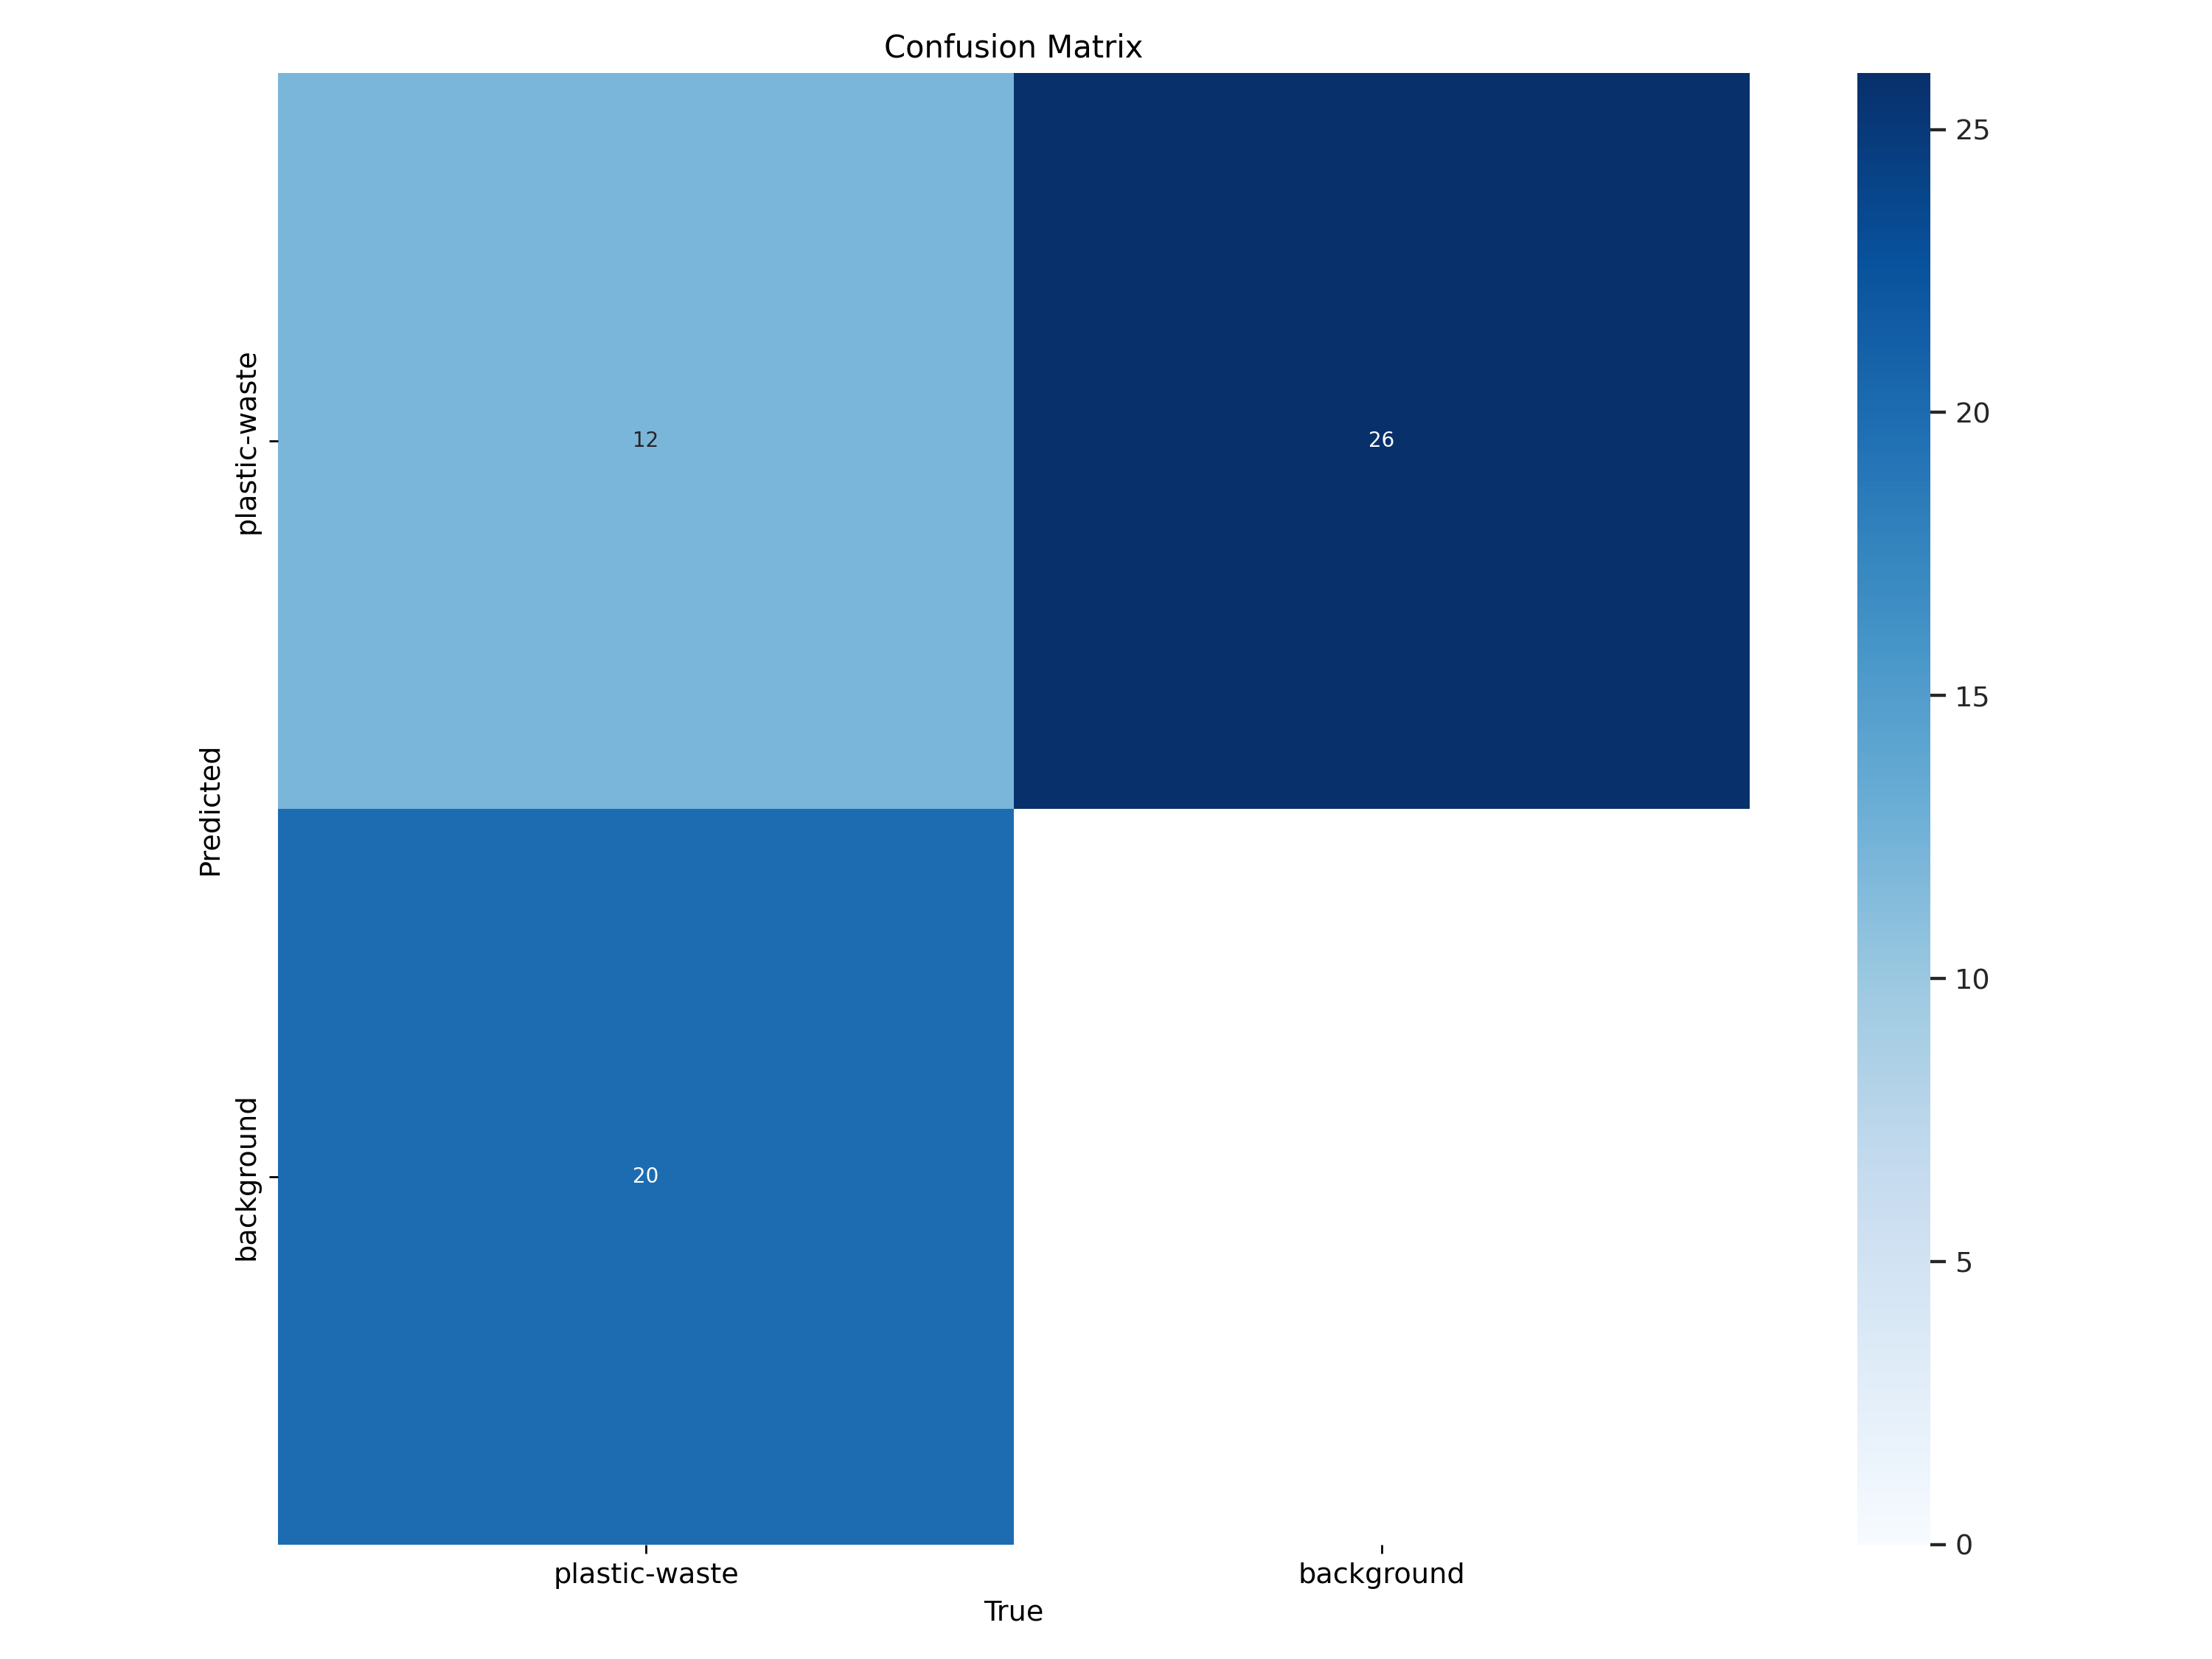

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/Plastic_Waste/augmentation_med/confusion_matrix.png', width=600)

/content


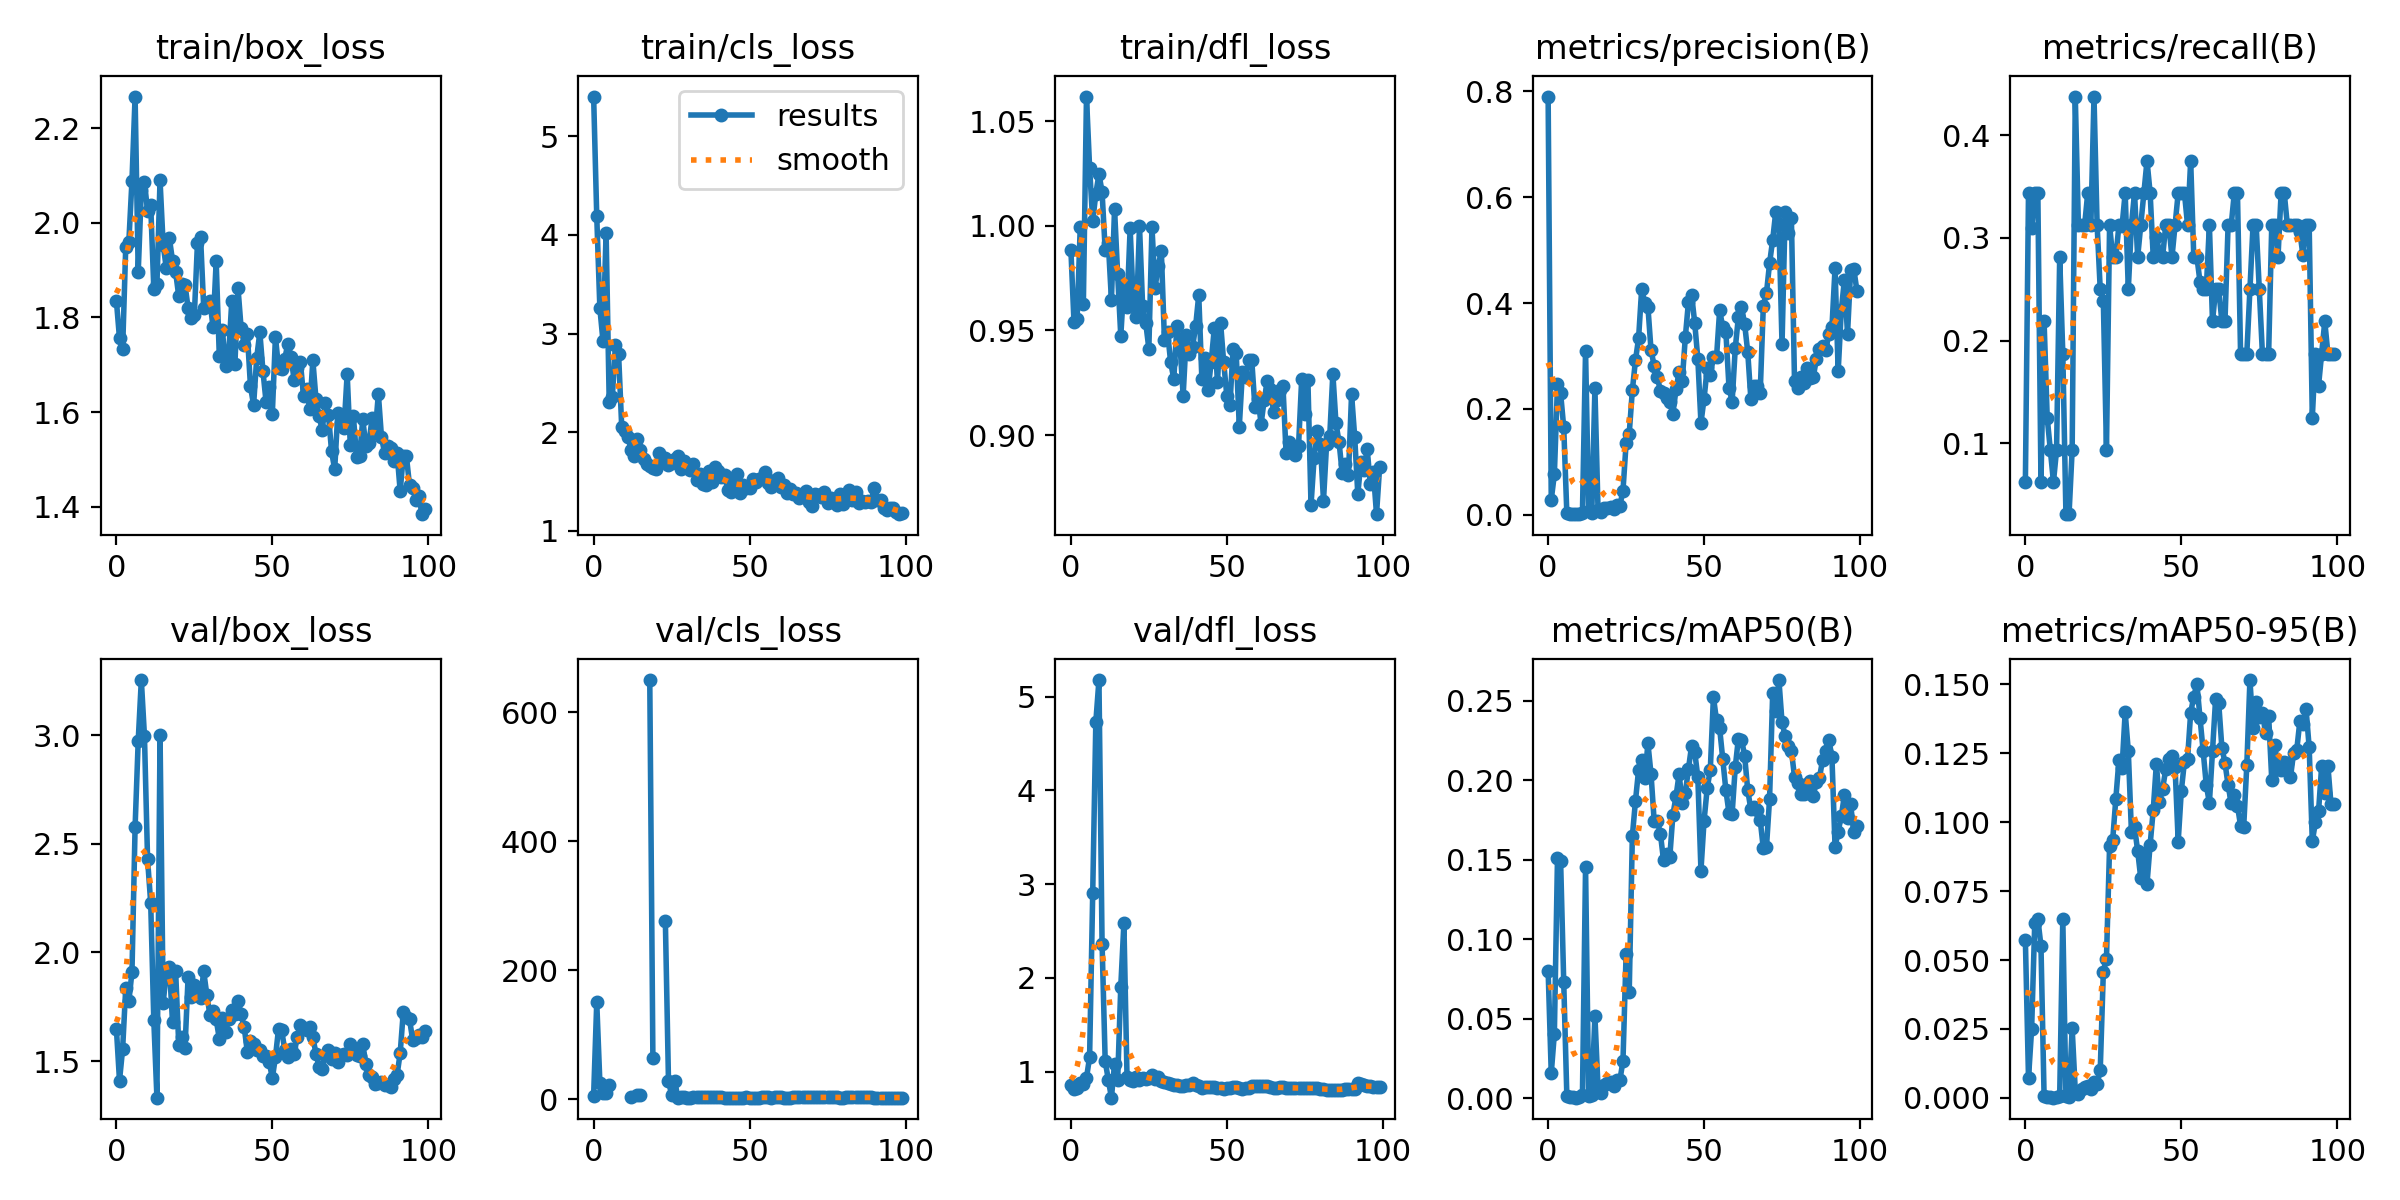

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/Plastic_Waste/augmentation_med/results.png', width=600)

/content


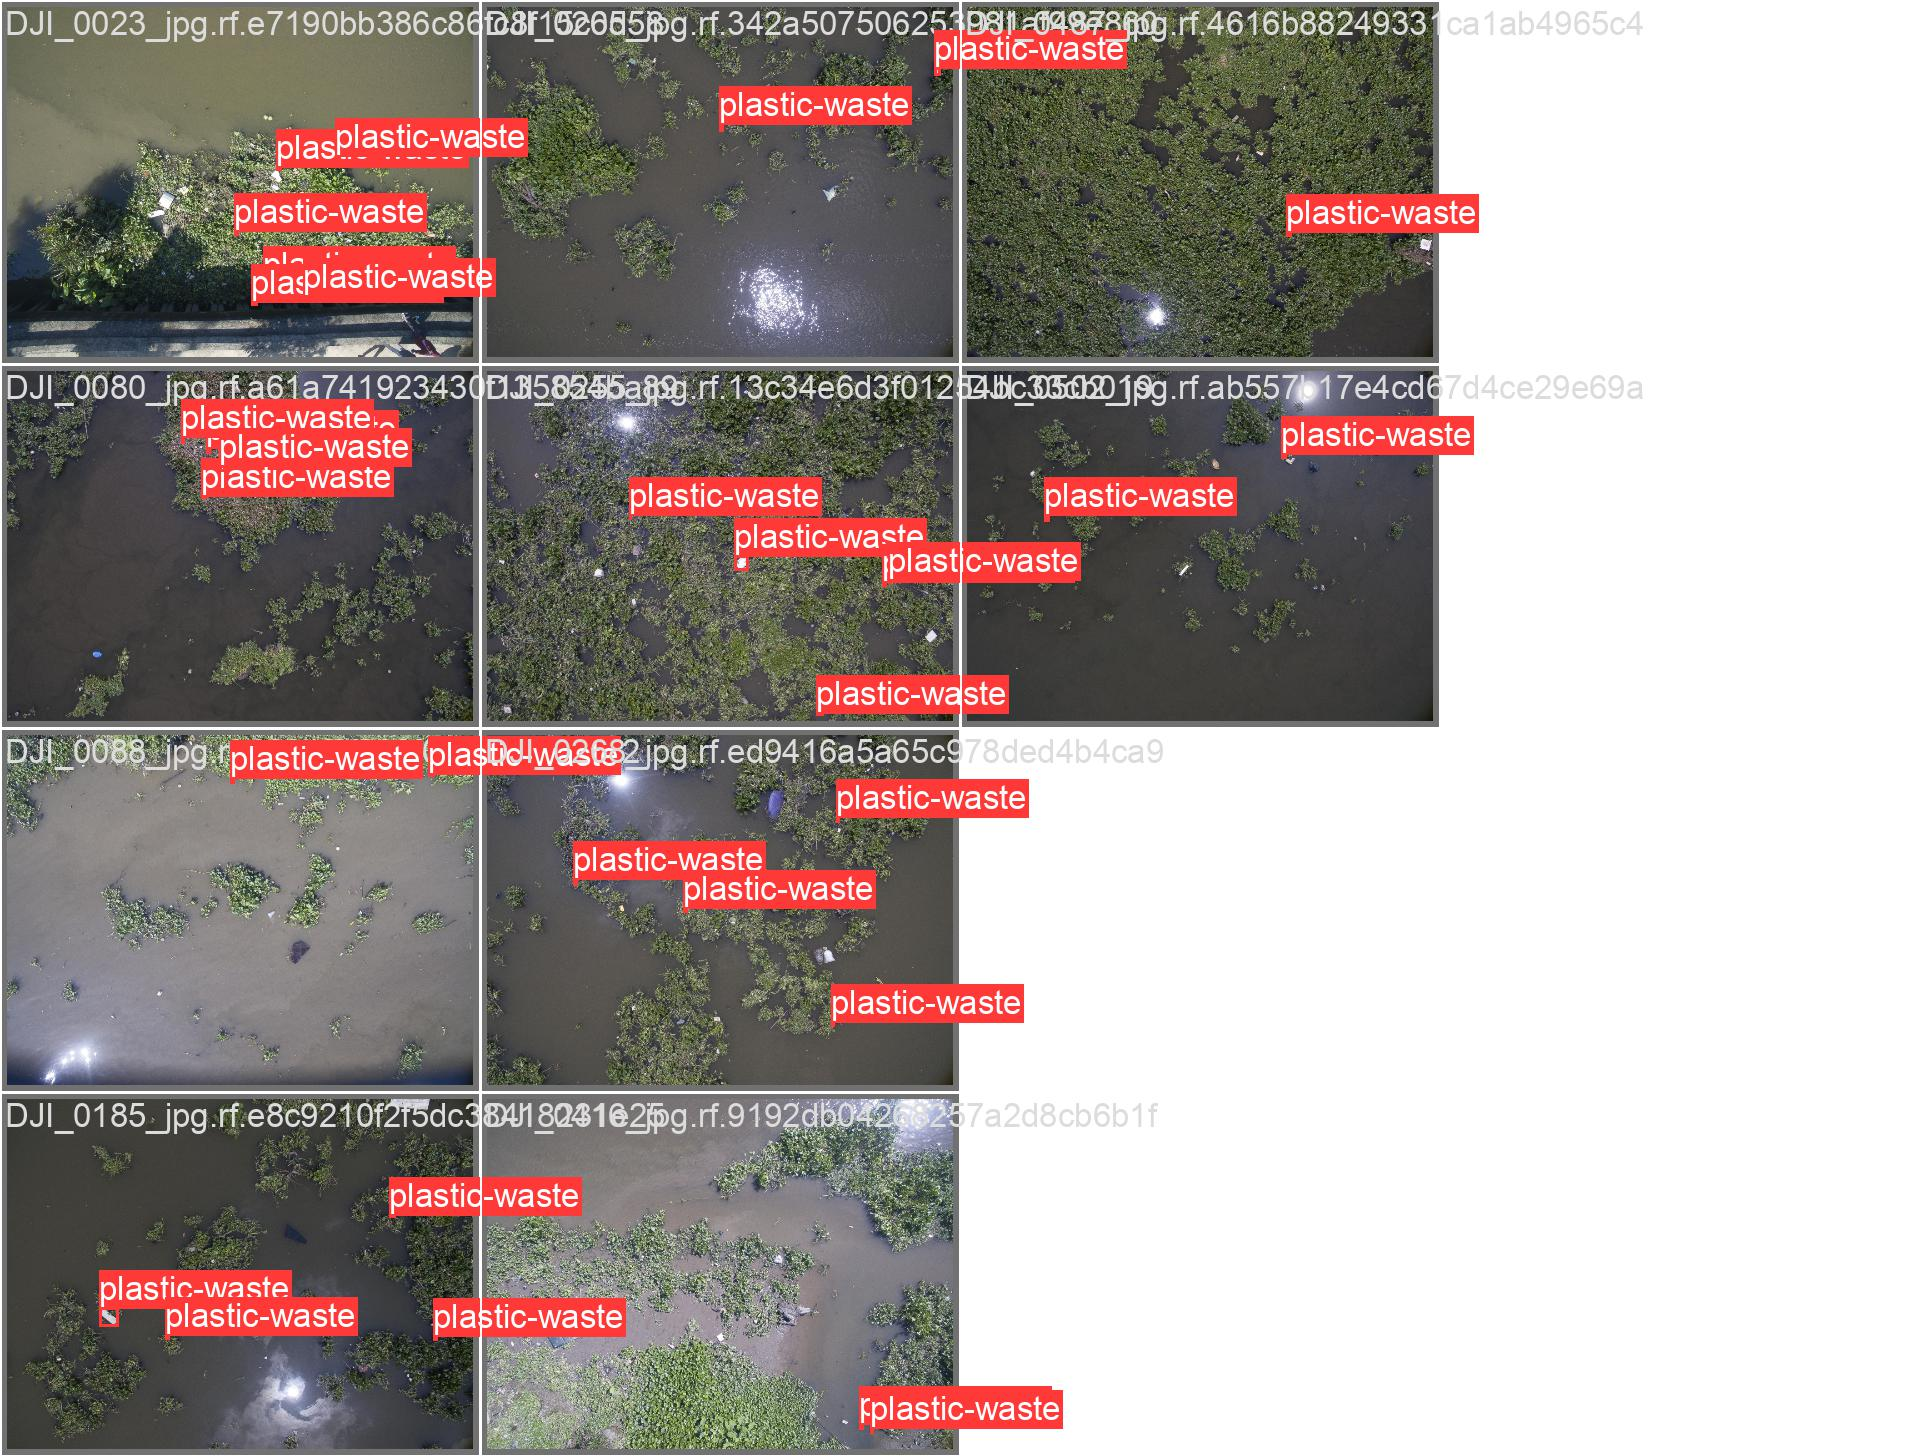

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/Plastic_Waste/augmentation_med/val_batch0_labels.jpg', width=1000)

/content


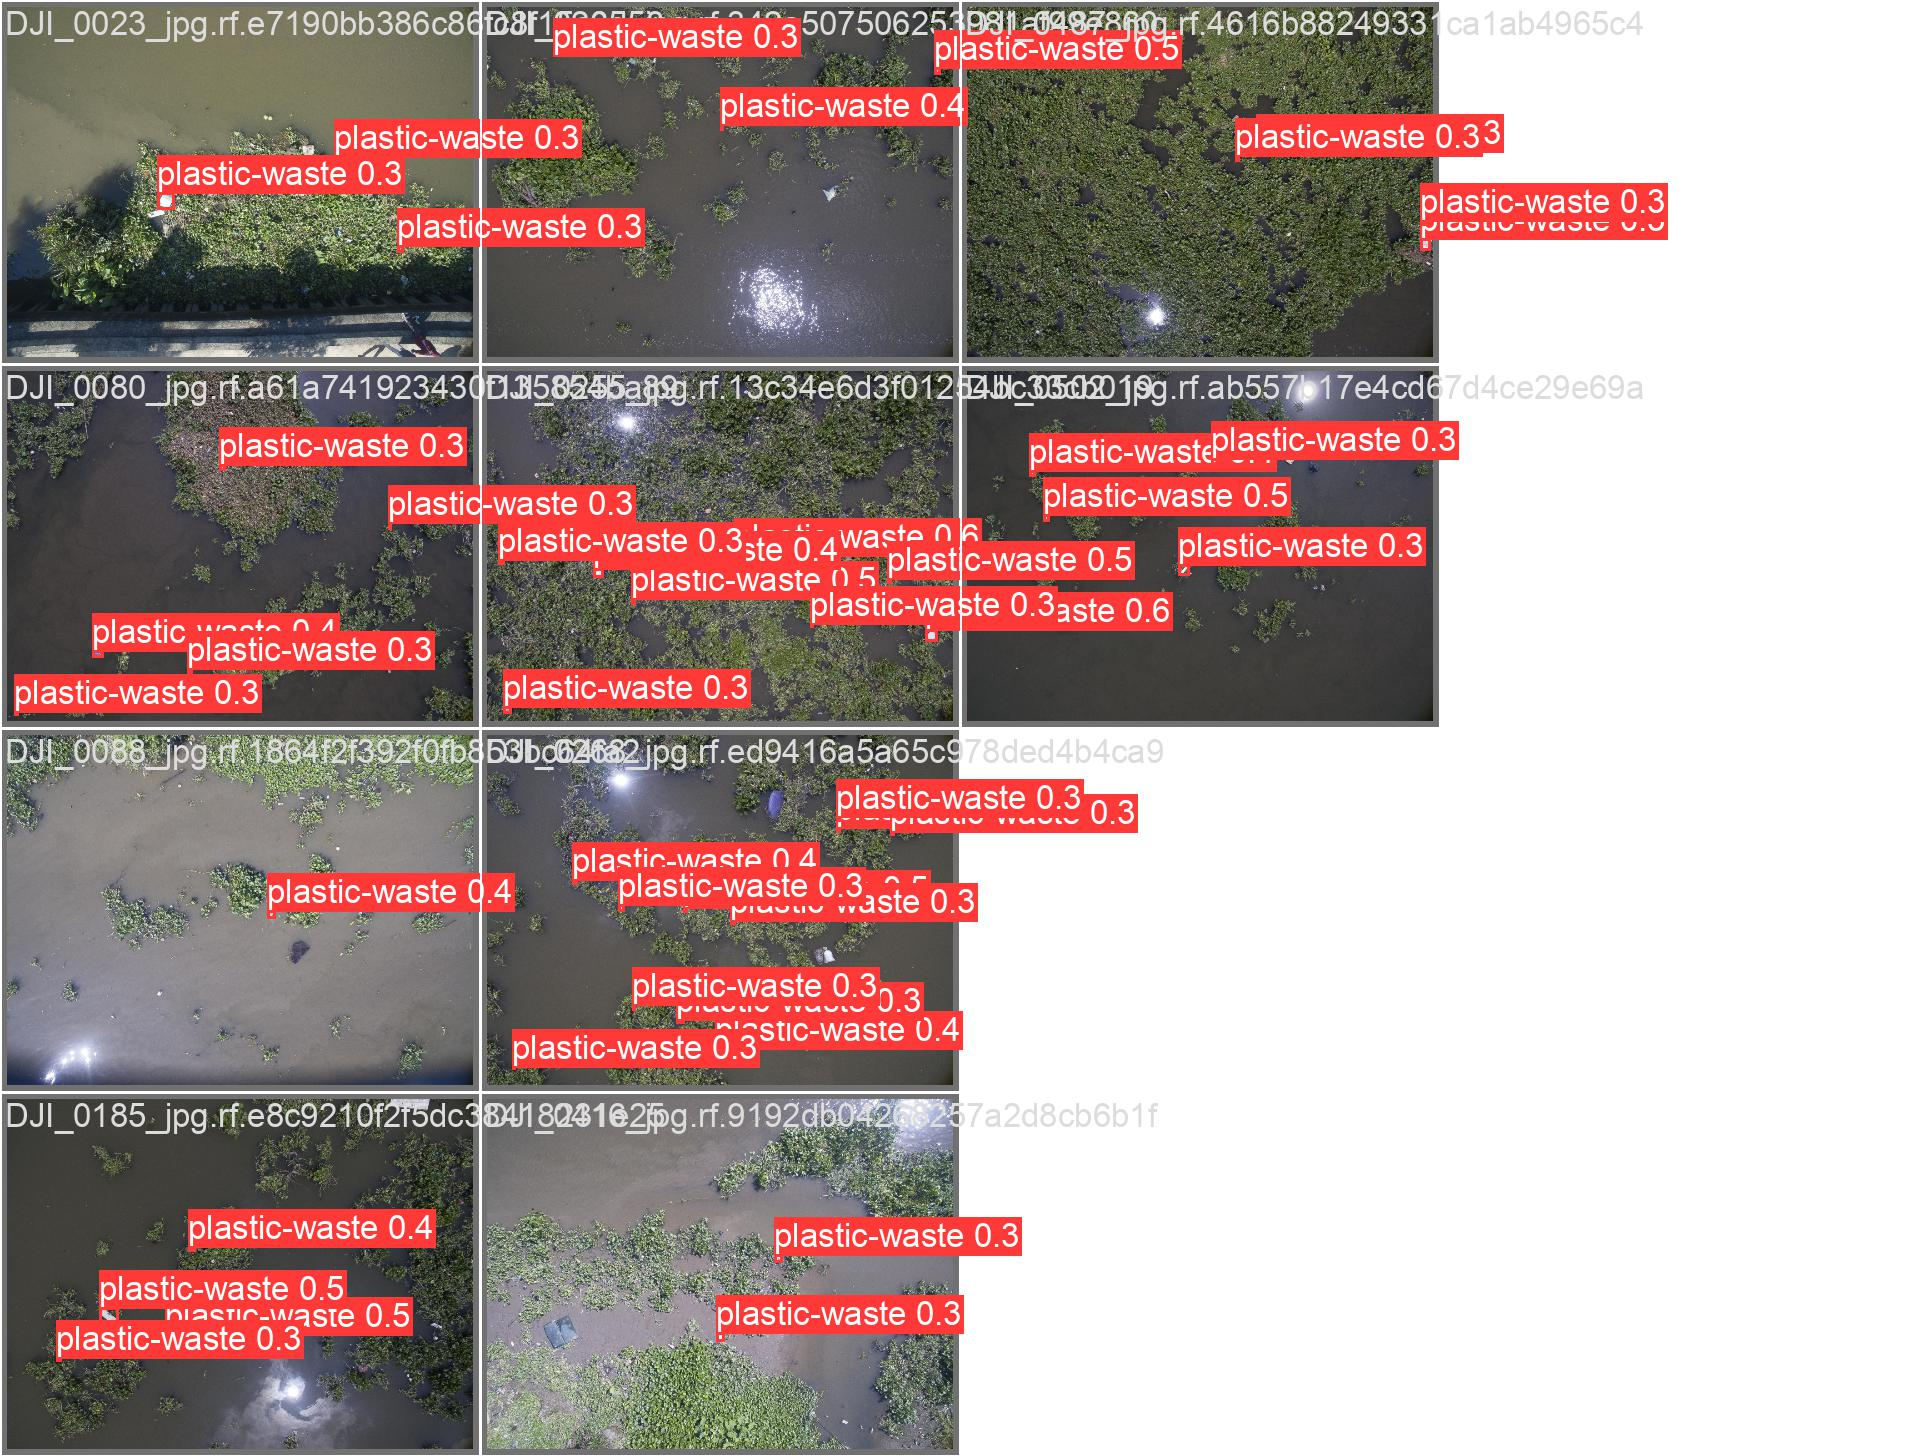

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/Plastic_Waste/augmentation_med/val_batch0_pred.jpg', width=1000)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model=/content/Plastic_Waste/models/best_tune2.pt data={dataset.location}/data.yaml augment=True agnostic_nms=True conf=0.55 save_txt=True  save_json=True iou=0.9

/content
Ultralytics YOLOv8.0.131 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients
val: Scanning /content/datasets/Plastic-waste-detection-2/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100% 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:07<00:00,  7.42s/it]
                   all         10         32          1     0.0312      0.516      0.258
Speed: 0.4ms preprocess, 115.5ms inference, 0.0ms loss, 22.3ms postprocess per image
Saving runs/detect/val15/predictions.json...
Results saved to runs/detect/val15


## Export Model to ONNX format

In [ ]:
!yolo export model=/content/Plastic_Waste/models/best_tune2.pt format=onnx

Ultralytics YOLOv8.0.131 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients

PyTorch: starting from /content/Plastic_Waste/models/best_tune2.pt with input shape (1, 3, 1024, 1024) BCHW and output shape(s) (1, 5, 21504) (49.7 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 253.0 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 5.9s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.14.0 opset 17...
============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

ONNX: export success ✅ 11.8s, saved as /content/Plastic_Waste/models/best_tune2.onnx (99.0 MB)

Export complete (20.1s)
Results sav

## Inference with Custom Model

In [ ]:
predict_path = '/content/drive/MyDrive/AI Hackathon REVA University/Predict'

In [ ]:
%cd {HOME}
#{HOME}/Plastic_Waste/augmentation_tune2/weights/best.pt
!yolo task=detect mode=predict model='/content/drive/MyDrive/AI Hackathon REVA University/best.pt' source='/content/drive/MyDrive/AI Hackathon REVA University/Predict' save=True  nms=True augment=True agnostic_nms=True  conf=0.4

/content
Ultralytics YOLOv8.0.131 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients

image 1/10 /content/drive/MyDrive/AI Hackathon REVA University/Predict/DJI_0023.jpg: 768x1024 1 plastic-waste, 298.7ms
image 2/10 /content/drive/MyDrive/AI Hackathon REVA University/Predict/DJI_0080.jpg: 768x1024 6 plastic-wastes, 137.4ms
image 3/10 /content/drive/MyDrive/AI Hackathon REVA University/Predict/DJI_0088.jpg: 768x1024 5 plastic-wastes, 108.7ms
image 4/10 /content/drive/MyDrive/AI Hackathon REVA University/Predict/DJI_0185.jpg: 768x1024 2 plastic-wastes, 90.8ms
image 5/10 /content/drive/MyDrive/AI Hackathon REVA University/Predict/DJI_0205.jpg: 768x1024 3 plastic-wastes, 139.4ms
image 6/10 /content/drive/MyDrive/AI Hackathon REVA University/Predict/DJI_0255.jpg: 768x1024 4 plastic-wastes, 106.4ms
image 7/10 /content/drive/MyDrive/AI Hackathon REVA University/Predict/DJI_0268.jpg: 768x1024 10 plastic-wastes, 95.